In [1]:
from helper import *

In [29]:
Nr = 30
Nc = 30
N = Nr*Nc

J2_list = np.array([0.])
l_list = np.array([0.95])
T_list = np.array([15, 12, 10, 8, 6, 5, 4, 3, 2, 1, 0.5])

h = 0.

Nwarmup = 10*N
Ncycle = 1000
Lcycle = 5*N

for l in l_list:
    run_script(Nr, Nc, J2_list, T_list, h, l, Nwarmup, Ncycle, Lcycle, tag='rkky_SEm_Nc%i'%(Ncycle), meas_config=False, meas_M=False, meas_E=False, meas_S=False, meas_SEm=True)


[15.  12.  10.   8.   6.   5.   4.   3.   2.   1.   0.5]
Beginning simulation for J2=0.000000, T=15.000000
Warming up
Starting cycles
0.5060 complete, ETA 0.98m
0.9820 complete, ETA 0.04m
J2: 0.00, Temp: 15.00, Time: 123.425s
Beginning simulation for J2=0.000000, T=12.000000
Warming up
Starting cycles
0.4570 complete, ETA 1.19m
0.8820 complete, ETA 0.27m
J2: 0.00, Temp: 12.00, Time: 139.226s
Beginning simulation for J2=0.000000, T=10.000000
Warming up
Starting cycles
0.3790 complete, ETA 1.64m
0.8140 complete, ETA 0.46m
J2: 0.00, Temp: 10.00, Time: 144.715s
Beginning simulation for J2=0.000000, T=8.000000
Warming up
Starting cycles
0.4480 complete, ETA 1.23m
0.8910 complete, ETA 0.24m
J2: 0.00, Temp: 8.00, Time: 135.041s
Beginning simulation for J2=0.000000, T=6.000000
Warming up
Starting cycles
0.4100 complete, ETA 1.44m
0.8310 complete, ETA 0.41m
J2: 0.00, Temp: 6.00, Time: 143.695s
Beginning simulation for J2=0.000000, T=5.000000
Warming up
Starting cycles
0.4200 complete, ETA 1.38m

[20. 15. 12. 10.  8.  6.  5.  4.  3.  2.  1.]
[15.  12.  10.   8.   6.   5.   4.   3.   2.   1.   0.5]
[15.  12.  10.   8.   6.   5.   4.   3.   2.   1.   0.5]
[15. 12. 10.  8.  6.  5.  4.  3.  2.  1.]
[15. 12. 10.  8.  6.  5.  4.  3.  2.  1.]
[15. 12. 10.  8.  6.  5.  4.  3.  2.  1.]
[20. 15. 12. 10.  8.  6.  5.  4.  3.  2.  1.]


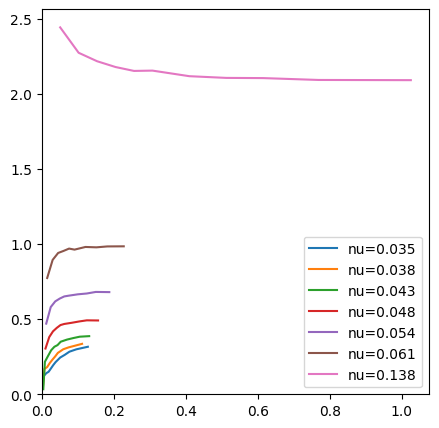

In [5]:
l_list = np.flip([0.5, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])

fig, ax = plt.subplots(1, 1, figsize=(5,5))

eps = 0.05

for l in l_list: 
    with h5py.File('data/rkky_Sem_Nc1000-l%.2f-J20.00-h0.00-N900.h5'%(l), 'r') as f:
        T_list = np.array(f['T_list'], dtype=float)
        SEm_array = np.array(f['SEm_array'])

    print(T_list)
    nT = len(T_list)
    C_list = np.zeros((nT))
    
    nu = 0.138/(2*l)**2
    
    for i in range(nT):
        beta = 1/T_list[i]
        Em = SEm_array[i]

        C_list[i] = np.mean((eps/(Em**2 + eps**2)))
    ax.plot(T_list*(nu**1.5), C_list, label='nu=%.3f'%nu)

ax.set_ybound(lower=0)
ax.set_xbound(lower=0)
ax.legend()    

# fig.savefig('figures/rkky_resistivity.pdf',dpi=300,bbox_inches="tight")

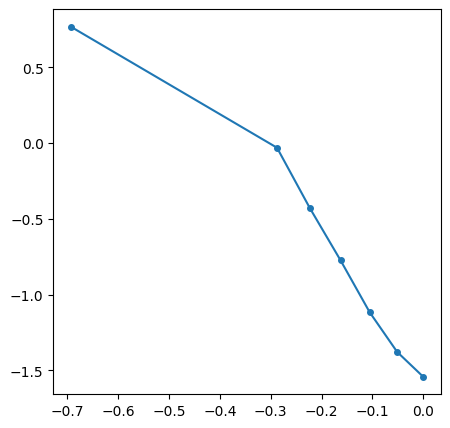

In [3]:
l_list = np.flip([0.5, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])

fig, ax = plt.subplots(1, 1, figsize=(5,5))

eps = 0.05
ti = 5

nl = len(l_list)

C0_list = np.zeros((nl))

for i in range(nl): 
    with h5py.File('data/rkky_Sem_Nc1000-l%.2f-J20.00-h0.00-N900.h5'%(l_list[i]), 'r') as f:
        T_list = np.array(f['T_list'], dtype=float)
        SEm_array = np.array(f['SEm_array'])

    beta = 1/T_list[ti]
    Em = SEm_array[ti]

    C0_list[i] = np.mean((eps/(Em**2 + eps**2)))

ax.plot(np.log(l_list), np.log(C0_list), marker='.', markersize=8)

# ax.set_ybound(lower=0)
# ax.set_xbound(lower=0)
# fig.savefig('figures/rkky_resistivity.pdf',dpi=300,bbox_inches="tight")